<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [173]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [174]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
data = pd.read_csv('drive/MyDrive/temp/train.csv',
                   na_values=["NaN"," "])

In [177]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent',
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [178]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3390,6,20.15,130.50,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),0
4108,11,20.00,196.35,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
4774,64,25.55,1714.95,Female,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
778,10,19.75,208.25,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),0
3969,9,77.65,714.15,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),1


In [179]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [180]:
data = data.dropna()

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

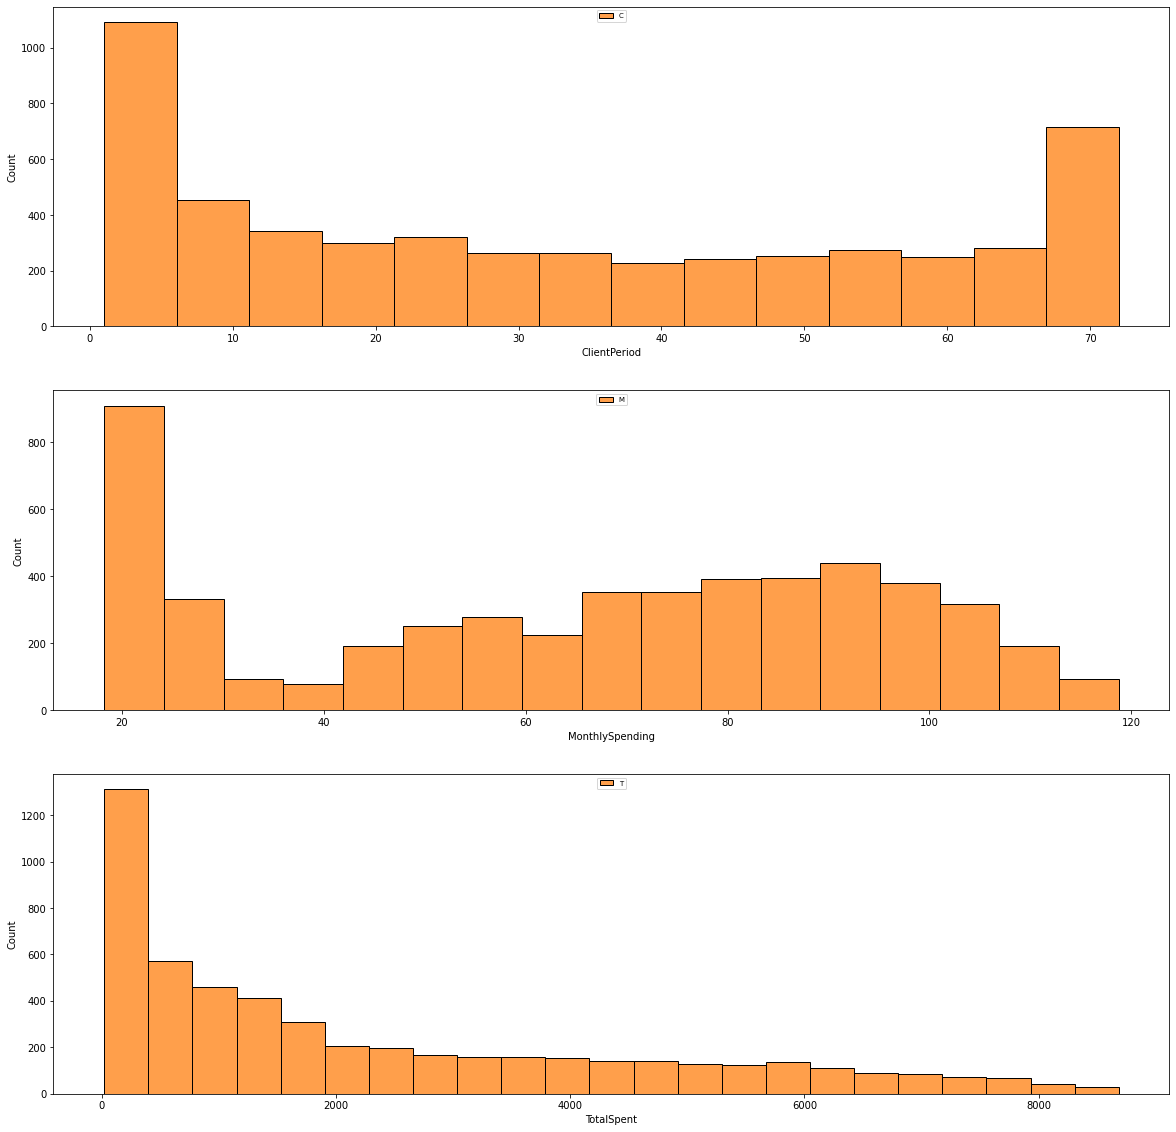

In [181]:
fig, ax = plt.subplots(len(num_cols),)
fig.set_size_inches(20,20)
for i in range(len(num_cols)):
  sns.histplot(data=data,
               x=data[num_cols[i]],
               color = '#ff7f0e',
               ax=ax[i],)
  ax[i].legend(num_cols[i],
              loc=9,
              fontsize='x-small')

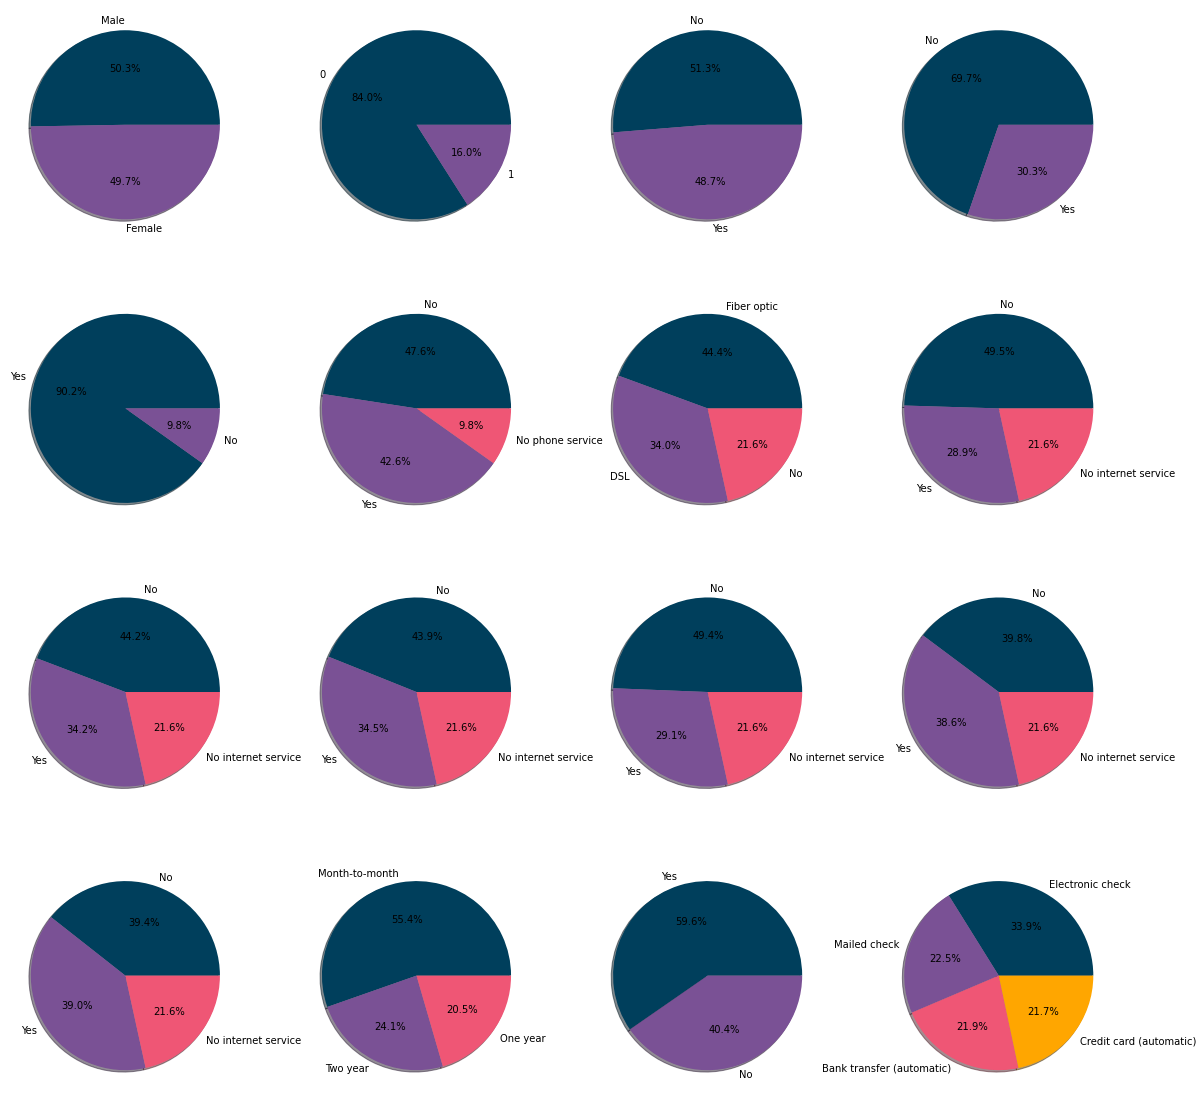

In [182]:
fig,ax = plt.subplots(4,4)
fig.set_size_inches(20,20)
k = 0
colors = ['#003f5c','#7a5195','#ef5675','#ffa600']
for i in range(4):
  for j in range(4):
    temp = data[cat_cols[k]].value_counts()
    counts = temp.values
    labels = list(temp.index)
    ax[i,j].pie(counts,
                labels=labels,
                autopct='%1.1f%%',
                shadow=True,
                colors=colors)
    k=k+1


In [183]:
for i in range(len(cat_cols)):
  print(data[cat_cols[i]].value_counts())

Male      2651
Female    2622
Name: Sex, dtype: int64
0    4431
1     842
Name: IsSeniorCitizen, dtype: int64
No     2704
Yes    2569
Name: HasPartner, dtype: int64
No     3676
Yes    1597
Name: HasChild, dtype: int64
Yes    4754
No      519
Name: HasPhoneService, dtype: int64
No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64
Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64
No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int64
No                     2331
Yes                    1805
No internet service    1137
Name: HasOnlineBackup, dtype: int64
No                     2316
Yes                    1820
No internet service    1137
Name: HasDeviceProtection, dtype: int64
No                     2603
Yes                    1533
No internet service    1137
Name: HasTechSupportAccess, dtype: int64
No    

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

([<matplotlib.patches.Wedge at 0x7ffba4344650>,
 [Text(-0.7467590456276939, 0.8076824424074204, '0'),
  Text(0.7467590456276938, -0.8076824424074206, '1')],
 [Text(-0.4073231157969239, 0.4405540594949566, '73.8%'),
  Text(0.4073231157969238, -0.44055405949495663, '26.2%')])

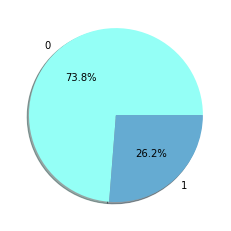

In [184]:
colors = ['#94fff6','#65abd2']
fig,ax = plt.subplots()
temp = data['Churn'].value_counts()
counts = temp.values
labels = list(temp.index)
ax.pie(counts,
      labels=labels,
      autopct='%1.1f%%',
      shadow=True,
      colors=colors)

*Классы несбалансированные. Класс с меткой "0" преобладает( >73%).*

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [185]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [203]:
X_numeric = data[num_cols]
X_cat = data[cat_cols]
dummy_features = pd.get_dummies(X_cat)
X = pd.concat([X_numeric, dummy_features],axis=1)
y = data['Churn']
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.36,
                                                 random_state=91)
clf = make_pipeline(StandardScaler(),
                    LogisticRegression())
param_grid = {'logisticregression__C':[100, 10, 1, 0.1, 0.01, 0.001],
              'logisticregression__penalty':['l1','l2','elasticnet'],}
grid_cv = GridSearchCV(clf,
                       param_grid,
                       scoring='roc_auc',
                       cv=5,
                       refit=True,
                       n_jobs=-1,)


grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_clas

In [196]:
grid_cv.best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [197]:
grid_cv.best_params_

{'logisticregression__C': 10, 'logisticregression__penalty': 'l2'}

In [204]:
grid_cv.best_score_

0.8519507041541343

ROC-AUC 0.851. Параметры = {C = 10, L2 регуляризация}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost
import catboost
from catboost import CatBoostClassifier

In [223]:
X = data.drop(['Churn'],axis=1)
X['TotalSpent'] = X['TotalSpent'].astype(float)
X['IsSeniorCitizen'] = X['IsSeniorCitizen'].astype(object)
ix = [i for i in range(3,19)]
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 data['Churn'],
                                                 test_size=0.3,
                                                 random_state=88)

In [225]:
boost = CatBoostClassifier(cat_features=ix,
                           random_seed = 88,
                           verbose = False)
param_grid = {'learning_rate':[0.001,0.01,0.1,],
              'depth':[2,4,6,8],
              'l2_leaf_reg':[1,3,5],
}
grid_cv = boost.grid_search(param_grid,
                            X_train,
                            y_train,
                            plot=True,
                            refit=True)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.4771596534
bestIteration = 999

0:	loss: 0.4771597	best: 0.4771597 (0)	total: 3.78s	remaining: 2m 12s

bestTest = 0.4169943487
bestIteration = 728

1:	loss: 0.4169943	best: 0.4169943 (1)	total: 7.59s	remaining: 2m 9s

bestTest = 0.4200893457
bestIteration = 76

2:	loss: 0.4200893	best: 0.4169943 (1)	total: 11.6s	remaining: 2m 8s

bestTest = 0.4757351536
bestIteration = 999

3:	loss: 0.4757352	best: 0.4169943 (1)	total: 15.3s	remaining: 2m 2s

bestTest = 0.4169481787
bestIteration = 795

4:	loss: 0.4169482	best: 0.4169482 (4)	total: 19.1s	remaining: 1m 58s

bestTest = 0.4167513849
bestIteration = 70

5:	loss: 0.4167514	best: 0.4167514 (5)	total: 23.1s	remaining: 1m 55s

bestTest = 0.4754641283
bestIteration = 999

6:	loss: 0.4754641	best: 0.4167514 (5)	total: 26.7s	remaining: 1m 50s

bestTest = 0.4167571007
bestIteration = 764

7:	loss: 0.4167571	best: 0.4167514 (5)	total: 30.5s	remaining: 1m 46s

bestTest = 0.4147786056
bestIteration = 79

8:	loss: 0.4147786	best: 0.41477

In [226]:
grid_cv['params']

{'depth': 2, 'l2_leaf_reg': 5, 'learning_rate': 0.1}

In [227]:
boost = CatBoostClassifier(depth=2,
                           l2_leaf_reg=5,
                           learning_rate=0.1,
                           cat_features=ix)
boost.fit(X_train,y_train)
y_train_pred = boost.predict_proba(X_train)[:,1]
y_test_pred = boost.predict_proba(X_test)[:,1]

0:	learn: 0.6484564	total: 4.82ms	remaining: 4.81s
1:	learn: 0.6123835	total: 9.72ms	remaining: 4.85s
2:	learn: 0.5818704	total: 14.5ms	remaining: 4.82s
3:	learn: 0.5601396	total: 19.3ms	remaining: 4.81s
4:	learn: 0.5426471	total: 23.9ms	remaining: 4.75s
5:	learn: 0.5267525	total: 28.4ms	remaining: 4.71s
6:	learn: 0.5056926	total: 32.8ms	remaining: 4.65s
7:	learn: 0.4899570	total: 36.6ms	remaining: 4.53s
8:	learn: 0.4812441	total: 41.1ms	remaining: 4.53s
9:	learn: 0.4712306	total: 45.3ms	remaining: 4.49s
10:	learn: 0.4644340	total: 49.4ms	remaining: 4.44s
11:	learn: 0.4580523	total: 53ms	remaining: 4.36s
12:	learn: 0.4533716	total: 57.2ms	remaining: 4.34s
13:	learn: 0.4491413	total: 61.9ms	remaining: 4.36s
14:	learn: 0.4458011	total: 66.5ms	remaining: 4.37s
15:	learn: 0.4427041	total: 70.8ms	remaining: 4.35s
16:	learn: 0.4403398	total: 74.9ms	remaining: 4.33s
17:	learn: 0.4374260	total: 79.2ms	remaining: 4.32s
18:	learn: 0.4351663	total: 83.1ms	remaining: 4.29s
19:	learn: 0.4333560	tot

In [229]:
print('Лучшее качество: ', 'train_roc-auc: ', roc_auc_score(y_train,y_train_pred),'test_roc-auc: ', roc_auc_score(y_test,y_test_pred))

Лучшее качество:  train_roc-auc:  0.8771843694047528 test_roc-auc:  0.8411677454153182


In [230]:
print('Параметры модели: ', grid_cv['params'])

Параметры модели:  {'depth': 2, 'l2_leaf_reg': 5, 'learning_rate': 0.1}


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [231]:
best_model = boost

In [237]:
X_test = pd.read_csv('drive/MyDrive/temp/test.csv')
submission = pd.read_csv('drive/MyDrive/temp/submission.csv')
X_test = X_test.replace(' ', float('0'))
X_test = X_test.replace('?', float('0'))
X_test['TotalSpent'] = X_test['TotalSpent'].astype(float)
submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('drive/MyDrive/temp/my_submission.csv',
                  index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.